In [1]:
import numpy as np 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

/Users/phivu/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/yy/7q_gmwc10sd3qdpgyfbhm17c0000gn/T/ipykernel_20530/2484224172.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should b

### 1. Load data

In [2]:
merged = pd.read_csv('../data/curated/prop_feature.csv')
merged.columns

Index(['id', 'postcode', 'type', 'price', 'bond', 'bed', 'bath', 'parking',
       'is_furnished', 'latitude', 'longitude', 'sa2', 'dist_CBD',
       'dist_public_transport', 'dist_hospital', 'dist_police_station',
       'dist_supermarket', 'dist_market', 'dist_shopping_center',
       'dist_school', 'dur_CBD', 'dur_public_transport', 'dur_hospital',
       'dur_police_station', 'dur_supermarket', 'dur_market',
       'dur_shopping_center', 'dur_school', 'income', 'population_density',
       'crime_density', 'rent'],
      dtype='object')

Encoding property type

In [3]:
type_encoder = LabelEncoder()
type_encoder.fit(merged['type'])
merged['type'] = type_encoder.transform(merged['type'])

In [4]:
type_encoder.transform(['Apartment / Unit / Flat', 'House', 'Other'])

array([0, 1, 2])

In [5]:
shuffled_data = shuffle(merged, random_state=30034)

In [6]:
useful = ['type', 'bond', 'bed', 'bath', 'parking',
                'is_furnished', 'dist_CBD', 'dist_public_transport', 'dist_hospital',
                'dist_police_station', 'dist_supermarket', 'dist_market',
                'dist_shopping_center', 'dist_school', 'income', 'population_density', 'crime_density',
                'rent']
feature = shuffled_data[useful]
price = shuffled_data['price']
feature.shape, price.shape

((8974, 18), (8974,))

### 2. Feature check with linear model

In [7]:
feature = sm.add_constant(feature)
olsm = sm.OLS(price, feature).fit()
olsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     418.4
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:56:17   Log-Likelihood:                -61789.
No. Observations:                8974   AIC:                         1.236e+05
Df Residuals:                    8955   BIC:                         1.238e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -720.1413     27.126    -26.548      0.000    -773.314    -666.969
type                    -11.3832      6.070     -1.875      0.061     -23.282       0.515
bond                      0.0165      0.001     25.333      0.000       0.015       0.018
bed                      71.7460      3.444     20.835      0.000      64.996      78.496
bath                    141.6242      4.926     28.752      0.000     131.969     151.280
parking                  15.8365      2.739      5.783      0.000      10.468      21.205
is_furnished             78.4959      7.719     10.169      0.000      63.365      93.627
dist_CBD                 -0.0002   3.99e-05     -4.776      0.000      -0.000      -0.000
dist_public_transport     0.0022      0.001      1.913      0.056   -5.53e-05       0.005
dist_hospital             0.0035      0.000      8.000      0.000       0.003       0.004
dist_police_station      -0.0074      0.001     -7.352      0.000      -0.009      -0.005
dist_supermarket         -0.0034      0.002     -1.809      0.070      -0.007       0.000
dist_market              -0.0052      0.002     -3.000      0.003      -0.009      -0.002
dist_shopping_center      0.0013      0.001      2.510      0.012       0.000       0.002
dist_school              -0.0006      0.002     -0.311      0.756      -0.004       0.003
income                    0.0057      0.000     20.333      0.000       0.005       0.006
population_density        0.0027      0.001      3.141      0.002       0.001       0.004
crime_density             0.0155      0.006      2.607      0.009       0.004       0.027
rent                      1.0857      0.045     24.239      0.000       0.998       1.173
==============================================================================
Omnibus:                     6997.891   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1952387.100
Skew:                           2.749   Prob(JB):                         0.00
Kurtosis:                      75.050   Cond. No.                     1.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
import statsmodels.formula.api as smf

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    """
    included = list(initial_list)
    while True:
        changed=False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Adding {best_feature} with p-value {best_pval:.6}')

        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # Use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() 
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Dropping {worst_feature} with p-value {worst_pval:.6}')
        if not changed:
            break
    return included

# Using the stepwise selection function to get the optimal predictors
optimal_predictors = stepwise_selection(feature, price)
optimal_predictors

Adding bath with p-value 0.0
Adding rent with p-value 0.0
Adding bond with p-value 5.71983e-162
Adding const with p-value 2.68609e-109
Adding income with p-value 3.85306e-62
Adding bed with p-value 9.29727e-65
Adding crime_density with p-value 1.05108e-51
Adding is_furnished with p-value 4.80101e-23
Adding dist_police_station with p-value 5.57438e-13
Adding dist_hospital with p-value 1.05342e-13
Adding parking with p-value 1.47706e-07
Adding dist_CBD with p-value 9.59736e-06
Adding dist_market with p-value 4.05123e-05
Adding population_density with p-value 0.0023522
Adding dist_shopping_center with p-value 0.002588


['bath',
 'rent',
 'bond',
 'const',
 'income',
 'bed',
 'crime_density',
 'is_furnished',
 'dist_police_station',
 'dist_hospital',
 'parking',
 'dist_CBD',
 'dist_market',
 'population_density',
 'dist_shopping_center']

internal feature: feature directly related of the property

external feature: feature related to the location of the property, including the distance to useful infrastructure and the feature of the sa2 region

++++bath | +bond | +++bed | +++is_furnished | +parking | --type 

+rent | +income | -dist_police_station | +crime | +dist_hospital | +population_density | -dist_CBD | -dist_market | +dist_shopping_center

In [9]:
selected = ['bath',
                   'rent',
                   'bond',
                   'income',
                   'bed',
                   'population_density',
                   'is_furnished',
                   'dist_police_station',
                   'dist_hospital',
                   'parking',
                   'crime_density',
                   'dist_market',
                   'dist_CBD',
                   'dist_shopping_center']
feature = shuffled_data[selected]
feature

,bath,rent,bond,income,bed,population_density,is_furnished,dist_police_station,dist_hospital,parking,crime_density,dist_market,dist_CBD,dist_shopping_center
6264,1.0,391.000000,1907.0,57800.000000,3.0,812.763501,0,2500,936,2.0,20.642723,1287,152867,1165
3780,1.0,450.000000,1955.0,65075.000000,2.0,3855.685494,0,2366,2843,1.0,368.195252,2270,19483,2349
5998,1.0,370.000000,1912.0,52497.443655,2.0,185.094974,0,1919,2683,1.0,22.288245,942,37802,1329
8068,2.0,403.333333,2390.0,62139.000000,4.0,212.902171,0,4665,8283,2.0,3.832719,5259,33544,3344
8680,2.0,377.666667,1907.0,58052.315190,4.0,205.436282,0,2690,2511,2.0,4.189601,2245,114133,2337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8500,1.0,320.000000,910.0,49475.000000,1.0,169.138608,0,4648,3427,1.0,28.588415,1489,154639,1224
6455,1.0,450.000000,1955.0,59530.000000,3.0,712.754070,0,5065,3357,1.0,14.894252,2463,90781,3591
7808,2.0,421.000000,2086.0,56857.586402,4.0,223.408411,0,11168,12075,1.0,13.830257,9828,49626,6695
2350,1.0,540.000000,3150.0,69345.000000,2.0,6580.938773,0,467,1226,1.0,1277.451447,1068,3137,568


In [10]:
x, x_test, y,  y_test = train_test_split(feature, price, train_size=0.9, shuffle=False)

### 3. Random forest model

In [11]:
def percent_diff(predict, true, limit=0.05, output='p'):
    """This function calulate the how close the result of the prediction is to the true value
        based on the percent different of the two

    Args:
        predict (array): array of the predicted value
        true (array): array of the true value to be compared to
        percent_output (bool, optional): return the percent different array if True. Defaults to False.
        limit (float, optional): If percent_output is False, percent different array is compared to be less 
                                           than the limit and return the percent of True . Defaults to 0.05.

    Returns:
        array or float: read Args for more info
    """    
    if len(predict) != len(true):
        print('Not same length')
        return False
    # 
    predict = np.array(predict)
    true = np.array(true)
    percent = np.abs(predict -  true) / true
    
    if output == 'l':
        return percent
    if output == 'p':
        return np.sum(percent < limit) / len(true)
    if output == 'a':
        return np.average(percent)

 + Grid search for best hyperparam

In [12]:
N_TREE = [10, 100, 200, 300, 400, 500, 600, 700]
MAX_DEPTH = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [13]:
rf_models = {n_tree: [] for n_tree in N_TREE}
for n_tree in N_TREE:
    for depth in MAX_DEPTH:
        print(n_tree, depth)
        regr = RandomForestRegressor(n_estimators=n_tree ,max_depth=depth, max_features='log2', random_state=30034, n_jobs=-1)
        regr.fit(x, y)
        rf_models[n_tree].append(regr)

10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
100 2
100 3
100 4
100 5
100 6
100 7
100 8
100 9
100 10
100 11
200 2
200 3
200 4
200 5
200 6
200 7
200 8
200 9
200 10
200 11
300 2
300 3
300 4
300 5
300 6
300 7
300 8
300 9
300 10
300 11
400 2
400 3
400 4
400 5
400 6
400 7
400 8
400 9
400 10
400 11
500 2
500 3
500 4
500 5
500 6
500 7
500 8
500 9
500 10
500 11
600 2
600 3
600 4
600 5
600 6
600 7
600 8
600 9
600 10
600 11
700 2
700 3
700 4
700 5
700 6
700 7
700 8
700 9
700 10
700 11


In [14]:
rf_score = {score: {n_tree: [] for n_tree in N_TREE}
                 for score in ['mse', 'rs']}
for n_tree in N_TREE:
    for depth in MAX_DEPTH:
        model = rf_models[n_tree][depth - 2]
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        rs = r2_score(y_test, y_pred)
        # these two would be similar
        rf_score['mse'][n_tree].append(mse)
        rf_score['rs'][n_tree].append(rs)

,10,100,200,300,400,500,600,700
0,32877.057815,30958.366839,31620.255851,31127.496348,31463.939425,31543.512478,31438.350197,31335.996259
1,25997.247949,23211.522708,23376.579850,22527.666951,22874.488378,23145.910273,22964.536930,22803.984385
2,17076.889952,17525.520286,17412.530241,17322.186594,17399.160612,17478.057358,17570.192273,17493.561504
3,14886.649809,14416.499454,14625.592293,14371.245524,14182.582945,14229.049914,14176.698591,14161.020611
4,13462.844165,12160.685198,12383.241101,12437.546449,12363.014435,12552.355176,12610.966977,12561.087329
5,12239.990953,11743.404512,11490.850280,11169.704755,11229.636572,11209.543819,11296.734858,11389.467857
6,13736.934781,11659.742342,10587.724426,10612.866188,10386.648178,10330.047489,10306.947141,10274.745708
7,15140.237386,9111.351656,9250.372118,9491.768627,9468.846992,9527.673762,9539.040389,9501.795009
8,12411.405627,9687.682117,9523.068150,9265.243054,9318.853096,9275.690627,9213.246375,9161.304016
9,13517.010157,9341.493482,8950.442799,9092.021400,8996.407621,9011.931927,9039.110673,9066.989608


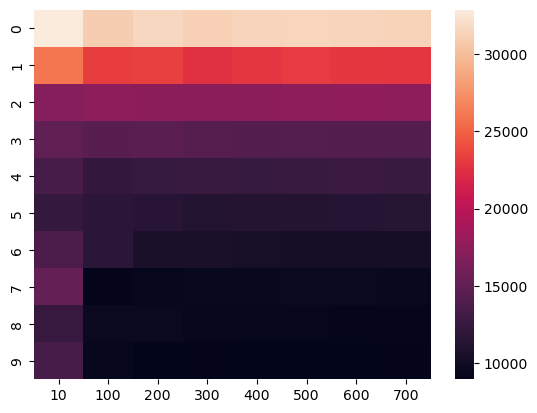

In [15]:
result = pd.DataFrame(rf_score['mse'])
sns.heatmap(result)
result

,10,100,200,300,400,500,600,700
0,0.523111,0.550942,0.541342,0.548489,0.543609,0.542455,0.543980,0.545465
1,0.622904,0.663312,0.660918,0.673231,0.668201,0.664264,0.666895,0.669223
2,0.752296,0.745789,0.747428,0.748738,0.747622,0.746477,0.745141,0.746252
3,0.784066,0.790886,0.787853,0.791542,0.794279,0.793605,0.794364,0.794591
4,0.804719,0.823607,0.820379,0.819591,0.820672,0.817925,0.817075,0.817799
5,0.822456,0.829659,0.833323,0.837981,0.837112,0.837403,0.836139,0.834793
6,0.800743,0.830873,0.846423,0.846058,0.849339,0.850161,0.850496,0.850963
7,0.780388,0.867838,0.865821,0.862320,0.862652,0.861799,0.861634,0.862174
8,0.819970,0.859478,0.861866,0.865606,0.864828,0.865454,0.866360,0.867113
9,0.803933,0.864500,0.870172,0.868118,0.869505,0.869280,0.868886,0.868481


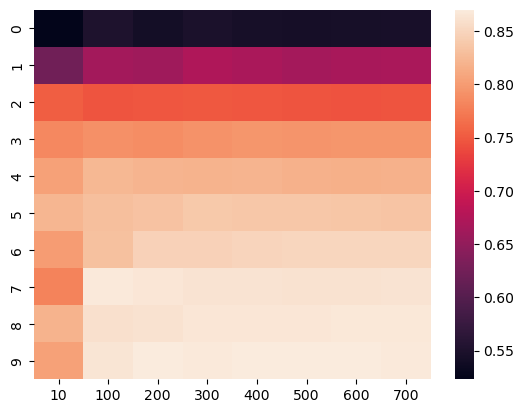

In [16]:
result = pd.DataFrame(rf_score['rs'])
sns.heatmap(result)
result

In [17]:
# best at n_estimators=200, max_depth=11
RFG = RandomForestRegressor(n_estimators=200, max_depth=11, max_features='log2', random_state=1234, n_jobs=-1)
RFG.fit(x, y)

RandomForestRegressor(max_depth=11, max_features='log2', n_estimators=200,
                      n_jobs=-1, random_state=1234)

+ Comparing with baseline model

In [18]:
y_pred = RFG.predict(x_test)
percent_diff(y_pred, y_test, limit=0.1, output='a'), percent_diff(merged['price'], merged['rent'], output='a')

(0.07287591148603619, 0.40669538816316375)

In [19]:
mean_squared_error(y_pred, y_test), mean_squared_error(merged['price'], merged['rent'])

(8652.796973086042, 114734.01614190885)

We can see that the model is about 5 times better with these metric

 + Feature importance

In [20]:
rf_feature_importance = pd.DataFrame([selected, RFG.feature_importances_], index=['feature_name', 'importance']).T
rf_feature_importance.sort_values(by='importance', ascending=False)

,feature_name,importance
2,bond,0.470976
0,bath,0.105037
12,dist_CBD,0.063852
4,bed,0.061911
1,rent,0.061002
5,population_density,0.03614
8,dist_hospital,0.032015
3,income,0.031017
9,parking,0.029738
13,dist_shopping_center,0.027693


### 4. Extra analysis

This plot shows at which price range the model is best at

(100.0, 2000.0)

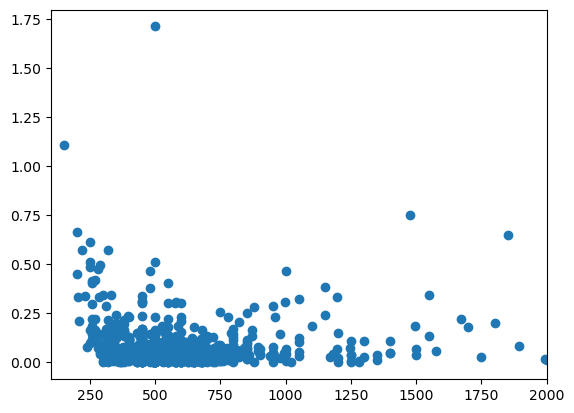

In [27]:
pcf = percent_diff(y_pred, y_test, limit=0.1, output='l')

plt.scatter(y_test, pcf)
plt.xlim(100, 2000)

This plot shows the predicted vs actual value

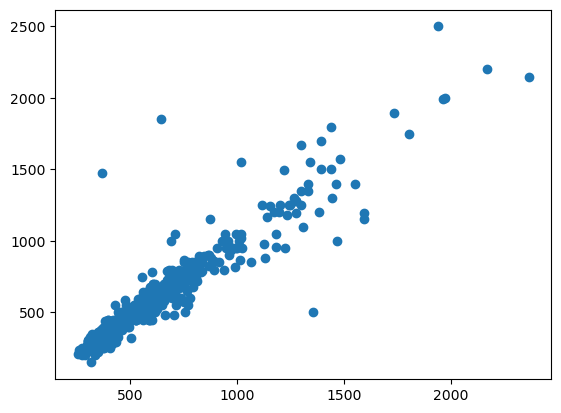

In [22]:
plt.scatter(y_pred, y_test)

In [23]:
merged['total_room'] = merged['bed'] + merged['bath']

Check distribution of price between furnished and unfurnished property

79.72508156967558

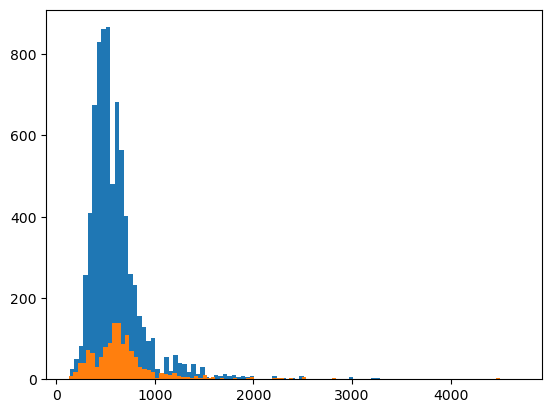

In [25]:
plt.hist(merged[merged['is_furnished'] == 0]['price'], bins=100)
plt.hist(merged[merged['is_furnished'] == 1]['price'], bins=100)
# average price differences
merged[merged['is_furnished'] == 1]['price'].mean() - merged[merged['is_furnished'] == 0]['price'].mean()

This plot shows the distribution of property price for the number of bedroom

Text(0.5, 1.0015, 'Average weekly rent vs number of bed room')

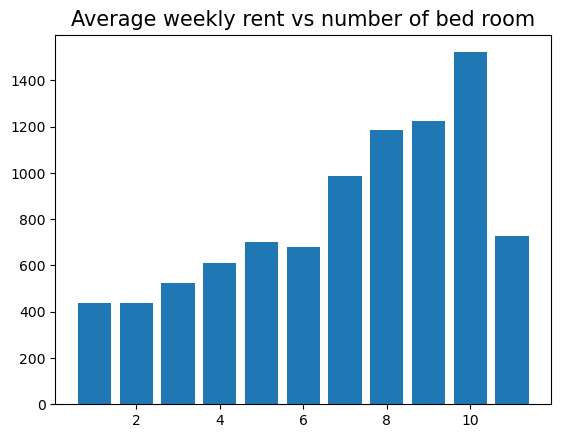

In [26]:
p = []
for i in range(1, 12):
    p.append(merged[merged['total_room'] == i]['price'].mean())
plt.bar(range(1, 12), p)
plt.title('Average weekly rent vs number of bed room', fontsize=15, y=1.0015)